In [50]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
dataa = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 20000)
dataa.head(5)

,customer_id,birth_year,education_level,marital_status,annual_income,num_children,num_teenagers,signup_date,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign
0,5524,1957,Graduation,Single,58138.0,0,0.0,4/9/2012,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1.0,8/3/2014,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10/2/2014,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0


In [51]:
dataa.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

<Axes: ylabel='annual_income'>

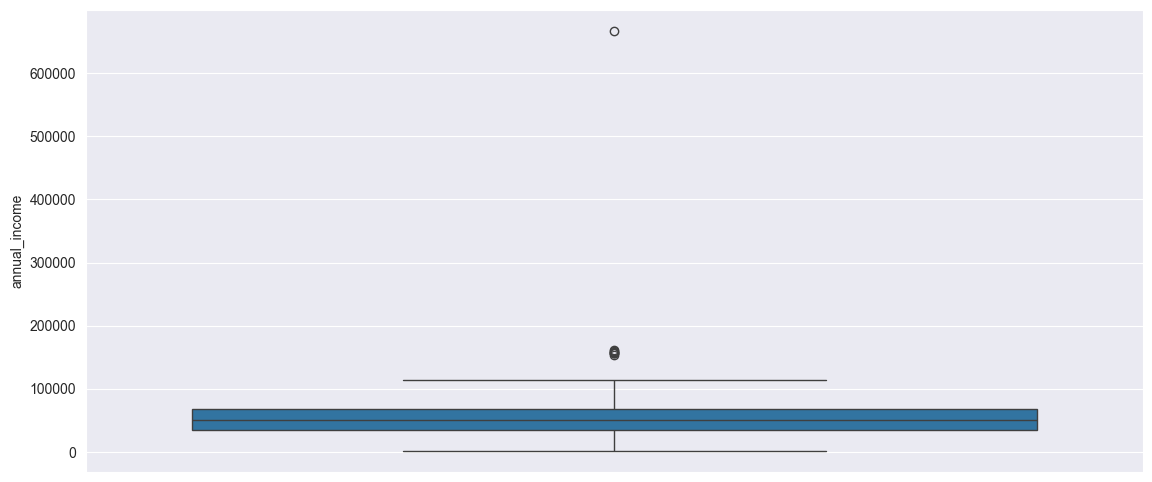

In [52]:
plt.figure(figsize=(30,6))
plt.subplot(1,2,1)
sns.boxplot(dataa["annual_income"])
#outlier then median

<Axes: ylabel='num_teenagers'>

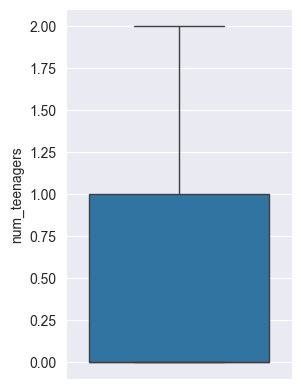

In [53]:
plt.subplot(1,2,2)
sns.boxplot(dataa["num_teenagers"])
#no outlier then mean

In [54]:
from sklearn.impute import SimpleImputer
si=SimpleImputer( strategy="median")
dataa["annual_income"]=si.fit_transform(dataa[["annual_income"]])

In [55]:
#check for missing value in annual income
dataa.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income                0
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

In [56]:
from sklearn.impute import SimpleImputer
si=SimpleImputer( strategy="mean")
dataa["num_teenagers"]=si.fit_transform(dataa[["num_teenagers"]]).ravel().astype(int)

In [57]:
#check for missing value in num_teenagers
dataa.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income                0
num_children                 0
num_teenagers                0
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

In [58]:
dataa["education_level"].value_counts()
#we can see that graduation is the most repeated so we should place any missing values with graduation

education_level
Graduation    1105
PhD            474
Master         365
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [59]:
mode_value=dataa["education_level"].mode()[0]
mode_value

'Graduation'

In [60]:
dataa["education_level"]=dataa["education_level"].fillna(mode_value)

In [61]:
dataa.isnull().sum()
#now we don't have any null values

customer_id                 0
birth_year                  0
education_level             0
marital_status              0
annual_income               0
num_children                0
num_teenagers               0
signup_date                 0
days_since_last_purchase    0
has_recent_complaint        0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                  0
num_discount_purchases      0
num_web_purchases           0
num_catalog_purchases       0
num_store_purchases         0
web_visits_last_month       0
accepted_campaign_1         0
accepted_campaign_2         0
accepted_campaign_3         0
accepted_campaign_4         0
accepted_campaign_5         0
accepted_last_campaign      0
dtype: int64

<Axes: ylabel='annual_income'>

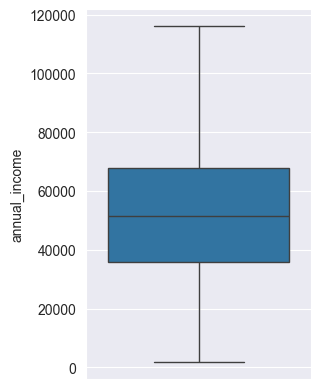

In [62]:
Q1=dataa.describe()["annual_income"]["25%"]
Q3=dataa.describe()["annual_income"]["75%"]
IQR=Q3 - Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
dataa["annual_income"]=dataa["annual_income"].clip(lower_limit,upper_limit)
plt.subplot(1,2,1)
sns.boxplot(dataa["annual_income"])


In [63]:
#Encoding nominal(no order) and ordinal(order)
#Educational level is ordinal order:( Basic,2 n cycle,Graduation,Master,PhD)
#Marital Status is nominal

In [64]:
#Encoding MaritalStatus (Nominal)
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
ohe=OneHotEncoder(sparse_output=False)
encoded=ohe.fit_transform(dataa[["marital_status"]])
new_dataa=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(["marital_status"]))
#new_dataa

In [65]:
#now we want to remove the marital status column and insert instead the encoded one

In [66]:
dataa.drop(columns=["marital_status"],inplace=True)
one_hot_encoded=pd.concat((dataa,new_dataa),axis=1)
dataa=one_hot_encoded
dataa.head(5)

,customer_id,birth_year,education_level,annual_income,num_children,num_teenagers,signup_date,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO
0,5524,1957,Graduation,58138.0,0,0,4/9/2012,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,Graduation,46344.0,1,1,8/3/2014,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,Graduation,71613.0,0,0,21-08-2013,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,Graduation,26646.0,1,0,10/2/2014,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,PhD,58293.0,1,0,19-01-2014,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
#Encoding educational level (ordinal)
encoder=OrdinalEncoder(categories=[["Basic","2n Cycle","Graduation","Master","PhD"]])
encoder_edu=encoder.fit_transform(one_hot_encoded[["education_level"]])
edu_dataa= pd.DataFrame(encoder_edu, columns=["education_level_encoded"])

In [68]:
one_hot_encoded.drop(columns=["education_level"],inplace=True)
#one_hot_encoded

In [69]:
dataa=pd.concat((one_hot_encoded,edu_dataa),axis=1)

In [70]:
dataa['age'] = 2025 - dataa['birth_year']

In [71]:
dataa['signup_date'] = pd.to_datetime(dataa['signup_date'], format='mixed', dayfirst=False)
today = pd.to_datetime("2025-01-01")
dataa['tenure_days'] = (today - dataa['signup_date']).dt.days

In [72]:
dataa = dataa.drop(columns=['birth_year'])
dataa = dataa.drop(columns=['customer_id'])
dataa = dataa.drop(columns=['signup_date'])
dataa.head(5)

,annual_income,num_children,num_teenagers,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO,education_level_encoded,age,tenure_days
0,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,68,4650
1,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,71,3804
2,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,60,4151
3,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,41,3744
4,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,44,4000


In [73]:
dataa['total_purchases'] = (
    dataa['num_web_purchases'] +
    dataa['num_catalog_purchases'] +
    dataa['num_store_purchases']
)
dataa['total_spending'] = (
    dataa['spend_wine'] +
    dataa['spend_fruits'] +
    dataa['spend_meat'] +
    dataa['spend_fish'] +
    dataa['spend_sweets'] +
    dataa['spend_gold']
)
dataa['total_dependents'] = (
    dataa['num_children'] +
    dataa['num_teenagers']
)
dataa['avg_spending_per_purchase'] = (
    dataa['total_spending'] / dataa['total_purchases'].replace(0, 1)
)
dataa['Total_Campaigns_accepted']=(
    dataa['accepted_campaign_1']+
    dataa['accepted_campaign_2']+
    dataa['accepted_campaign_3']+
    dataa['accepted_campaign_4']+
    dataa['accepted_campaign_5']
)
dataa.head(5)

,annual_income,num_children,num_teenagers,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,accepted_campaign_1,accepted_campaign_2,accepted_campaign_3,accepted_campaign_4,accepted_campaign_5,accepted_last_campaign,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO,education_level_encoded,age,tenure_days,total_purchases,total_spending,total_dependents,avg_spending_per_purchase,Total_Campaigns_accepted
0,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,68,4650,22,1617,0,73.500000,0
1,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,71,3804,4,27,2,6.750000,0
2,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,60,4151,20,776,0,38.800000,0
3,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,41,3744,6,53,1,8.833333,0
4,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,44,4000,14,422,1,30.142857,0


In [74]:
features = ['annual_income','num_children','num_teenagers',
    'days_since_last_purchase','has_recent_complaint',
    'spend_wine','spend_fruits','spend_meat','spend_fish',
    'spend_sweets','spend_gold','num_discount_purchases',
    'num_web_purchases','num_catalog_purchases',
    'num_store_purchases','web_visits_last_month',
    'education_level_encoded','marital_status_Absurd',
    'marital_status_Alone','marital_status_Divorced',
    'marital_status_Married','marital_status_Single',
    'marital_status_Together','marital_status_Widow',
    'marital_status_YOLO','age','tenure_days','total_purchases','total_spending','total_dependents','avg_spending_per_purchase','Total_Campaigns_accepted']

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataa[features])
dataa = pd.DataFrame(scaled_data, columns=features)
dataa.to_csv('cleaned.csv', index=False)

In [76]:
dataa.head(5)

,annual_income,num_children,num_teenagers,days_since_last_purchase,has_recent_complaint,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,education_level_encoded,marital_status_Absurd,marital_status_Alone,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,marital_status_YOLO,age,tenure_days,total_purchases,total_spending,total_dependents,avg_spending_per_purchase,Total_Campaigns_accepted
0,0.302483,-0.825218,-0.914573,0.307039,-0.097282,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.449420,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,0.985345,1.976745,1.313544,1.679417,-1.256611,0.770989,-0.439037
1,-0.266087,1.032559,0.927732,-0.383664,-0.097282,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.449420,-0.029894,-0.036621,-0.339909,-0.792406,1.914854,-0.591099,-0.188676,-0.029894,1.235733,-1.667011,-1.185022,-0.961275,1.415253,-0.683696,-0.439037
2,0.952091,-0.825218,-0.914573,-0.798086,-0.097282,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.449420,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,0.317643,-0.172468,1.035926,0.282673,-1.256611,0.014771,-0.439037
3,-1.215695,1.032559,-0.914573,-0.798086,-0.097282,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.449420,-0.029894,-0.036621,-0.339909,-0.792406,-0.522233,1.691765,-0.188676,-0.029894,-1.268149,-1.925433,-0.907403,-0.918094,0.079321,-0.638294,-0.439037
4,0.309955,1.032559,-0.914573,1.550305,-0.097282,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,1.555962,-0.029894,-0.036621,-0.339909,1.261980,-0.522233,-0.591099,-0.188676,-0.029894,-1.017761,-0.822831,0.203070,-0.305254,0.079321,-0.173895,-0.439037


In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [78]:
K_values = range(2, 10)   # tests 2,3,4,5,6,7,8

silhouette_scores = []

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42,n_init=10)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data,kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={K}, Silhouette Score={round(score, 4)}")

K=2, Silhouette Score=0.2403
K=3, Silhouette Score=0.168
K=4, Silhouette Score=0.1009
K=5, Silhouette Score=0.1027
K=6, Silhouette Score=0.0978
K=7, Silhouette Score=0.1147
K=8, Silhouette Score=0.1248
K=9, Silhouette Score=0.097


In [79]:
best_k = 2
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_kmeans.fit(scaled_data)
cluster_labels = final_kmeans.labels_
dataa['cluster'] = cluster_labels